# Einführung in das Thema Daten

Manche definieren **Statistik** als die Disziplin, die sich darauf konzentriert, Informationen in Wissen zu verwandeln. Der erste Schritt in diesem Prozess ist die Zusammenfassung und Beschreibung der Rohinformationen - der Daten. In dieser Übung erhalten Sie einen Einblick in die öffentliche Gesundheit, indem Sie einfache grafische und numerische Zusammenfassungen eines Datensatzes erstellen, der von den Centers for Disease Control and Prevention (CDC) gesammelt wurde.

## Erste Schritte

Das Behavioral Risk Factor Surveillance System (BRFSS) ist eine jährliche Telefonumfrage bei 350 000 Personen in den Vereinigten Staaten. Wie der Name schon sagt, dient das BRFSS der Ermittlung von Risikofaktoren in der erwachsenen Bevölkerung und der Meldung neuer Gesundheitstrends. So werden die Befragten beispielsweise nach ihrer Ernährung und ihrer wöchentlichen körperlichen Aktivität, ihrem HIV/AIDS-Status, möglichem Tabakkonsum und nach ihrem Krankenversicherungsschutz gefragt. Die [Website] der BRFSS (http://www.cdc.gov/brfss) enthält eine vollständige Beschreibung der Erhebung, einschließlich der Forschungsfragen, die der Studie zugrunde liegen, und vieler interessanter Ergebnisse, die aus den Daten abgeleitet wurden.

Wir werden uns auf eine Zufallsstichprobe von 20.000 Personen aus der BRFSS-Erhebung aus dem Jahr 2000 konzentrieren. Obwohl dieser Datensatz über 200 Variablen enthält, werden wir mit einer kleinen Teilmenge arbeiten.

Wir beginnen mit dem Einlesen des Datensatzes von 20.000 Beobachtungen aus einer csv-Datei.

In [41]:
import numpy as np
import pandas as pd

cdc = pd.read_csv("Daten/brfss_2000.csv")
cdc.shape

(20000, 9)

In [42]:
cdc.sample(10, random_state=999)

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
6743         1         1         0      71     170       170   23      m   
19360        1         0         1      64     120       117   45      f   
8104         1         1         1      70     192       170   64      m   
8535         1         1         1      64     165       140   67      f   
8275         1         1         0      69     130       140   69      m   
3511         0         1         0      63     128       128   37      f   
1521         1         1         0      68     176       135   37      f   
976          0         1         1      64     150       125   43      f   
14484        1         1         1      68     185       185   78      m   
3591         1         1         0      71     165       175   34      m   

         genhlth  
6743   very good  
19360  very good  
8104        good  
8535   excellent  
8275   very good  
3511   very good  
1521        good  
976         fair  
14484       good  
3591        fair

Der angezeigte Datensatz "cdc" ist ein Pandas DataFrame, bei dem jede Zeile für einen Fall und jede Spalte für eine Variable steht. Wir werden in den Übungen sehr viel mit DataFrames arbeiten.

Um die Namen der Variablen zu sehen, verwenden Sie "columns.values".

In [43]:
cdc.columns.values

array(['exerany', 'hlthplan', 'smoke100', 'height', 'weight', 'wtdesire',
       'age', 'gender', 'genhlth'], dtype=object)

Dies gibt die Namen `genhlth`, `exerany`, `hlthplan`, `smoke100`, `height`, `weight`, `wtdesire`, `age`, und `gender` zurück. Jede dieser Variablen entspricht einer Frage, die in der Erhebung gestellt wurde. Für die Variable `genhlth` wurden die Befragten beispielsweise gebeten, ihren allgemeinen Gesundheitszustand zu bewerten und entweder mit "ausgezeichnet", "sehr gut", "gut", "mittelmäßig" oder "schlecht" zu antworten. Die Variable `exerany` ("exercise any") gibt an, ob der Befragte im letzten Monat Sport getrieben hat (1) oder nicht (0). Ebenso gibt die Variable `hlthplan` an, ob der Befragte in irgendeiner Form krankenversichert war (1) oder nicht (0). Die Variable `smoke100` gibt an, ob die befragte Person in ihrem Leben mindestens 100 Zigaretten geraucht hat. Die anderen Variablen erfassen die Größe in Zoll (`height`), das Gewicht in Pfund (`weight`) sowie das Wunschgewicht (`wtdesire`), das Alter in Jahren (`age`) und das Geschlecht der Befragten (`gender`).

### ✏️ Aufgabe 1
Wie viele Fälle sind in diesem Datensatz enthalten? Wie viele Variablen? Geben Sie für jede Variable ihren Datentyp an (z. B. kategorisch, diskret).

Wir können uns die ersten Einträge (Zeilen) unserer Daten mit dem folgenden Befehl ansehen

In [44]:
cdc.head()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0        0         1         0      70     175       175   77      m   
1        0         1         1      64     125       115   33      f   
2        1         1         1      60     105       105   49      f   
3        1         1         0      66     132       124   42      f   
4        0         1         0      61     150       130   55      f   

     genhlth  
0       good  
1       good  
2       good  
3       good  
4  very good

und in ähnlicher Weise können wir uns die letzten ansehen, indem wir sie eingeben

In [45]:
cdc.tail()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
19995        1         1         0      66     215       140   23      f   
19996        0         1         0      73     200       185   35      m   
19997        0         1         0      65     216       150   57      f   
19998        1         1         0      67     165       165   81      f   
19999        1         1         1      69     170       165   83      m   

         genhlth  
19995       good  
19996  excellent  
19997       poor  
19998       good  
19999       good

Wenn Sie den Namen des DataFrame in eine Zelle eingeben, werden (je nach Einstellung des Jupyter Notebook Umgebung) die ersten und letzten Zeilen des DataFrames angezeigt.

In [46]:
cdc

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0            0         1         0      70     175       175   77      m   
1            0         1         1      64     125       115   33      f   
2            1         1         1      60     105       105   49      f   
3            1         1         0      66     132       124   42      f   
4            0         1         0      61     150       130   55      f   
...        ...       ...       ...     ...     ...       ...  ...    ...   
19995        1         1         0      66     215       140   23      f   
19996        0         1         0      73     200       185   35      m   
19997        0         1         0      65     216       150   57      f   
19998        1         1         0      67     165       165   81      f   
19999        1         1         1      69     170       165   83      m   

         genhlth  
0           good  
1           good  
2           good  
3           good  
4      very good  
...          ...  
19995       good  
19996  excellent  
19997       poor  
19998       good  
19999       good  

[20000 rows x 9 columns]

## Statistiken und Kennzahlen

Der BRFSS-Fragebogen ist eine riesige Fundgrube an Informationen. Ein guter erster Schritt bei jeder Analyse besteht darin, all diese Informationen in ein paar zusammenfassende Statistiken und Grafiken zu destillieren. Als einfaches Beispiel liefert die Funktion `describe` eine numerische Zusammenfassung: Häufigkeiten, Mittelwert, Standardabweichung, Minimum, erstes Quartil, Median, drittes Quartil und Maximum. Für `weight` ("Gewicht") ist dies

In [47]:
cdc['weight'].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

Wenn Sie den Interquartilsabstand für das Gewicht der Befragten berechnen wollen, könnten Sie sich die Ausgabe des obigen Zusammenfassungsbefehls ansehen und dann Folgendes eingeben

In [48]:
190 - 140

50

Python (bzw. Pandas) verfügt auch über eingebaute Funktionen, um zusammenfassende Statistiken nacheinander zu berechnen.

In [49]:
print('count:', cdc['weight'].count())
print('mean: ', cdc['weight'].mean())
print('std:  ', cdc['weight'].std())
print('var:  ', cdc['weight'].var())
print('min:  ', cdc['weight'].min())
print('25%:  ', cdc['weight'].quantile(0.25))
print('50%:  ', cdc['weight'].median())  # Erinnerung: der Median ist auch das zweite Quartil 
print('75%:  ', cdc['weight'].quantile(0.75))
print('max:  ', cdc['weight'].max())

count: 20000
mean:  169.68295
std:   40.080969967120254
var:   1606.4841535051958
min:   68
25%:   140.0
50%:   165.0
75%:   190.0
max:   500


Es ist zwar sinnvoll, eine quantitative Variable wie `weight` mit Hilfe dieser Statistiken zu beschreiben, aber was ist mit kategorialen Daten? Wir würden stattdessen die Stichprobenhäufigkeit oder die relative Häufigkeitsverteilung betrachten. Die Funktion `value_counts` erledigt dies für Sie, indem sie die Häufigkeiten der einzelnen Antworttypen zählt. Um zum Beispiel die Anzahl der Personen zu ermitteln, die in ihrem Leben 100 Zigaretten geraucht haben, geben Sie ein

In [50]:
cdc['smoke100'].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

oder sehen Sie sich stattdessen die relative Häufigkeitsverteilung an durch Eingabe von

In [88]:
cdc['smoke100'].value_counts(normalize = True)

0    0.52795
1    0.47205
Name: smoke100, dtype: float64

Beachten Sie, dass Python automatisch die relatnameen Häufigkeitsverteilungen anzeigt, indem es den Parameter `normalize` auf `True` setzt.

## Diagramme erzeugen
Es gibt verschiedene Wege, Diagramme in Python zu erzeugen. Wir benutzen die Modul `plotly` (https://plotly.com/python/), bzw. dessen Submodule `plotly.express` (https://plotly.com/python/plotly-express/), mit dem die gängingsten Diagramme über eine einfache, konsistente Schnittstelle erzeugt werden können. 

Wir erzeugen ein Säulendiagramm mit der Funktion `bar`:  

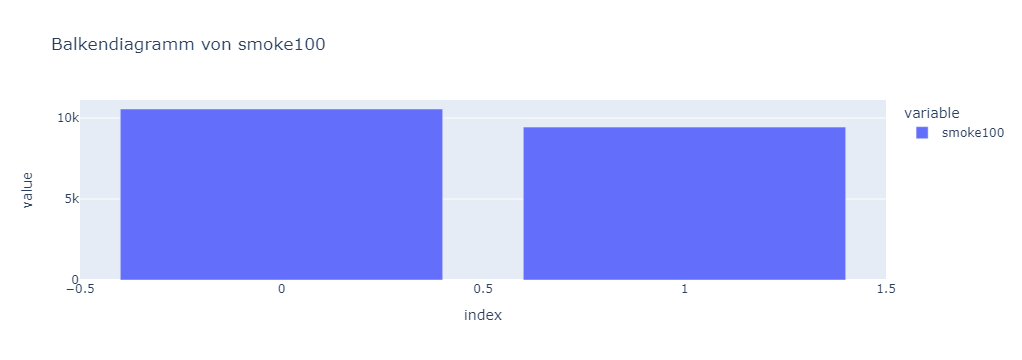

In [95]:
import plotly.express as px

px.bar(cdc['smoke100'].value_counts(), title = 'Balkendiagramm von smoke100')

Plotly hat ein Balkendiagramm erzeugt! Sie könnten dies auch in zwei Schritte aufteilen, indem Sie Folgendes eingeben:

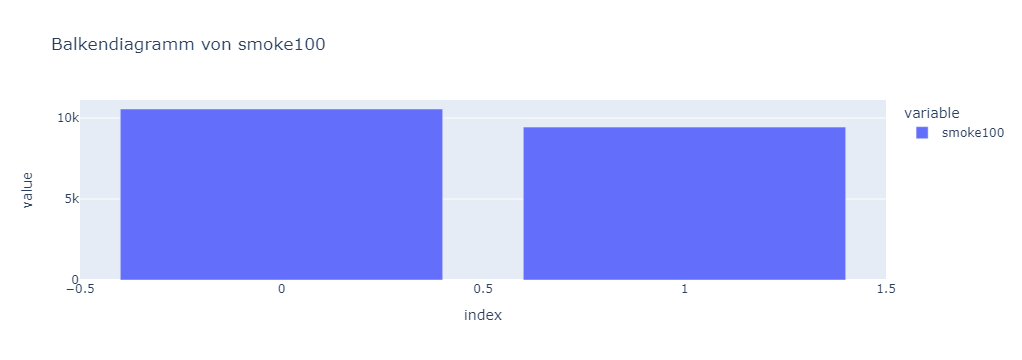

In [92]:
smoke = cdc['smoke100'].value_counts()
px.bar(smoke, title = 'Balkendiagramm von smoke100')

Hier haben wir ein neues Objekt mit dem Namen `smoke` erstellt (dessen Inhalt wir sehen können, wenn wir `smoke` in die Konsole eingeben) und es dann als Eingabe für `px.bar` verwendet.

Die Achsenbeschriftungen `index` und `value` leitet plotly aus dem übergebenen Objekt `cdc['smoke100'].value_counts()` ab. Über das  Argument `labels` können Sie Aliase dafür übergeben. Diese werden dann als Achsenbeschriftung dargestellt. 

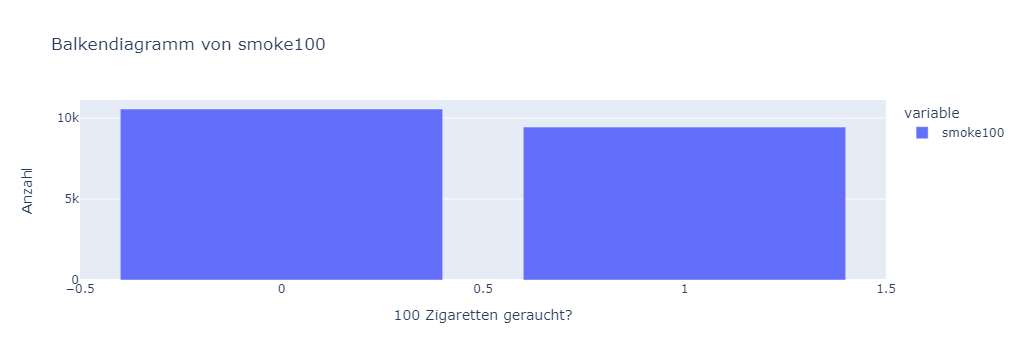

In [96]:
px.bar(smoke, title = 'Balkendiagramm von smoke100', labels={"index": "100 Zigaretten geraucht?", "value": "Anzahl"})

Schließlich können Sie die Größe der Figur in Pixeln über die Parameter `width` und `height` festlegen:

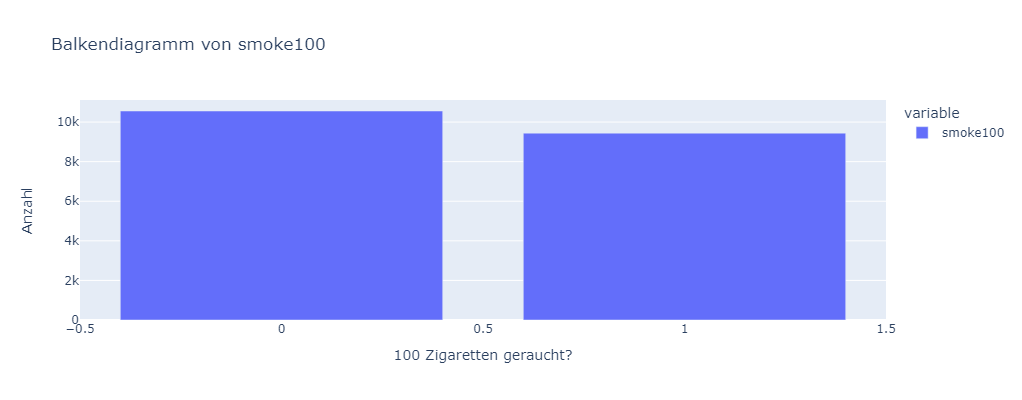

In [102]:
px.bar(smoke, title = 'Balkendiagramm von smoke100', labels={"index": "100 Zigaretten geraucht?", "value": "Anzahl"}, width=500, height=400)

### ✏️ Aufgabe 2
Erstellen Sie eine numerische Zusammenfassung für `height` und `age` und berechnen Sie jeweils den Interquartilsabstand. Berechnen Sie die relative Häufigkeitsverteilung für `gender` und `exerany`. Wie viele Männer sind in der Stichprobe? Welcher Anteil der Stichprobe gibt an, bei bester Gesundheit zu sein?

Der Befehl `value_counts()` mit `groupby` kann verwendet werden, um eine beliebige Anzahl von Variablen zu tabellieren, die Sie angeben. Um zum Beispiel zu untersuchen, welche Teilnehmer jedes Geschlechts geraucht haben, könnten wir Folgendes verwenden:

In [115]:
smoke_by_gender = cdc.groupby('gender')['smoke100'].value_counts(normalize = True).unstack()
smoke_by_gender

smoke100         0         1
gender                      
f         0.576359  0.423641
m         0.475180  0.524820

Was passiert bei der Verkettung
> `cdc.groupby('gender')['smoke100'].value_counts(normalize = True).unstack()` 

im Detail?
1. `cdc.groupby('gender')`: gruppiert den Datensatz nach Ausprägungen von `gender` (wie ein `group by`-clause in SQL).
2. `['smoke100']`: Wählt aus dem gruppierten Datensatz die Spalte `smoke100` aus.
3. `.value_counts(normalize = True)`: Aggregation auf dem gruppierten Datensatz. Hier: relative Häufigkeitsverteilung pro Gruppe (m/w).
4. `.unstack()`: `value_counts` auf einem gruppierten Datensatz gibt einen mehrstufigen Index zurück (jedes Element wird mit einem Tupel indiziert); mit `unstack` wird die zweite (=letzte) Komponente des Index (`smoke100`) als Spalte aufgefasst.

Zur Erinnerung: Die Spaltenbezeichnung 1 bedeutet, dass der Befragte mindestens 100 Zigaretten geraucht hat. Die Zeilen beziehen sich auf das Geschlecht. 

Zusammenhänge zwischen diesen Merkmalen kann man z.B. als gestapeltes Balkendiagramm visualisieren. Per default interpretiert plotly jede Zeile als eine Säule. Der Wert jeder Spalte wird in einer anderen Farbe angezeigt und zur Gesamthöhe "gestapelt".

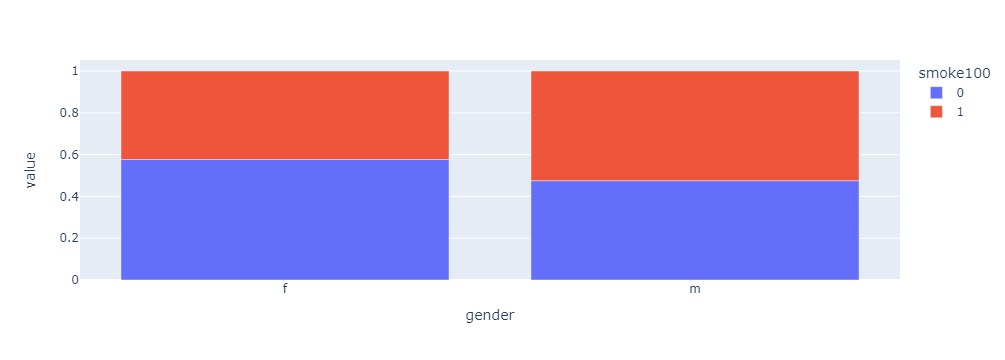

In [196]:
px.bar(smoke_by_gender)

# Äquivalent:
# px.bar(smoke_by_gender, x=smoke_by_gender.index, y=[0,1])

### ✏️ Aufgabe 3
Was verrät der das Diagramm über Rauchgewohnheiten und Geschlecht?

## Einschub: Wie Pandas mit Daten umgeht

DataFrames sind wie eine Art Tabelle. Jede Zeile ist eine andere Beobachtung (ein anderer Befragter) und jede Spalte eine andere Variable (die erste ist `genhlth`, die zweite `exerany` und so weiter). Wir können die Größe des DataFrame sehen, indem wir Folgendes eingeben

In [20]:
cdc.shape

(20000, 9)

was die Anzahl der Zeilen und Spalten zurückgibt. Wenn wir nun auf eine Teilmenge des vollständigen DataFrame zugreifen möchten, können wir die Zeilen- und Spaltenschreibweise verwenden. Um zum Beispiel die sechste Variable des 567. Befragten zu sehen, verwenden Sie das Format

In [128]:
cdc.iloc[566, 5] 

190

was uns das Gewicht der 567. Person (oder Beobachtung) liefert. Denken Sie daran, dass in Python die Indizierung bei 0 beginnt, so dass das erste Element einer Liste oder eines DataFrame durch den 0-ten Index ausgewählt wird.

Um die Gewichte für die ersten 10 Befragten zu sehen, können wir eingeben

In [129]:
cdc.iloc[0:10, 5]  # Achtung: der letzte Index (hier: 10) ist in Python ausgeschlossen.

0    175
1    115
2    105
3    124
4    130
5    114
6    185
7    160
8    130
9    170
Name: wtdesire, dtype: int64

Wenn wir schließlich alle Daten für die ersten 10 Befragten haben möchten, geht das mit

In [130]:
cdc.iloc[0:10,]

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0        0         1         0      70     175       175   77      m   
1        0         1         1      64     125       115   33      f   
2        1         1         1      60     105       105   49      f   
3        1         1         0      66     132       124   42      f   
4        0         1         0      61     150       130   55      f   
5        1         1         0      64     114       114   55      f   
6        1         1         0      71     194       185   31      m   
7        0         1         0      67     170       160   45      m   
8        0         1         1      65     150       130   27      f   
9        1         1         0      70     180       170   44      m   

     genhlth  
0       good  
1       good  
2       good  
3       good  
4  very good  
5  very good  
6  very good  
7  very good  
8       good  
9       good

Indem wir einen Index oder einen Bereich weglassen (wir haben nichts zwischen dem Komma und der eckigen Klammer eingegeben), erhalten wir alle Spalten. In der Regel lassen wir die Spaltennummer weg, um alle Spalten in einem DataFrame zu sehen. Um auf alle Beobachtungen zuzugreifen, lassen Sie einfach einen Doppelpunkt innerhalb der Klammer stehen. Probieren Sie Folgendes aus, um die Gewichte für alle 20.000 Befragten auf Ihrem Bildschirm zu sehen

In [131]:
cdc.iloc[:, 5]

0        175
1        115
2        105
3        124
4        130
        ... 
19995    140
19996    185
19997    150
19998    165
19999    165
Name: wtdesire, Length: 20000, dtype: int64

Erinnern Sie sich, dass die sechste Spalte das Gewicht der Befragten darstellt, so dass der obige Befehl alle Gewichte im Datensatz meldet. Eine alternative Methode für den Zugriff auf die Gewichtsdaten ist der Verweis auf den Namen. Zuvor gaben wir `cdc` ein, um alle im cdc-Datensatz enthaltenen Variablen anzuzeigen. Wir können jeden der Variablennamen verwenden, um Elemente in unserem Datensatz auszuwählen.

In [132]:
cdc['weight']

0        175
1        125
2        105
3        132
4        150
        ... 
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64

Damit wird Python angewiesen, im DataFrame `cdc` nach der Spalte `weight` zu suchen. Da es sich um einen einzelnen Vektor handelt, können wir ihn durch Hinzufügen eines weiteren Indexes in eckigen Klammern auf Teilmengen zugreifen. Wir sehen das Gewicht für den 567. Befragten, indem wir eingeben

In [133]:
cdc['weight'][566]

160

Ähnliches gilt für die ersten 10 Befragten

In [134]:
cdc['weight'][0:10]

0    175
1    125
2    105
3    132
4    150
5    114
6    194
7    170
8    150
9    180
Name: weight, dtype: int64

Der obige Befehl liefert das gleiche Ergebnis wie der Befehl `cdc.iloc[0:10, 5]`.

## Näheres zum Indizieren von DataFrames

Oft ist es sinnvoll, alle Personen (Fälle) in einem Datensatz zu extrahieren, die bestimmte Merkmale aufweisen. Dies erreichen wir durch Bedingungen. Betrachten Sie zunächst Ausdrücke wie

In [135]:
cdc['gender'] == 'm'

0         True
1        False
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999     True
Name: gender, Length: 20000, dtype: bool

oder

In [136]:
cdc['age'] > 30

0         True
1         True
2         True
3         True
4         True
         ...  
19995    False
19996     True
19997     True
19998     True
19999     True
Name: age, Length: 20000, dtype: bool

Diese Befehle erzeugen eine Series von `TRUE`- und `FALSE`-Werten. Für jeden Befragten gibt es einen Wert, wobei `TRUE` anzeigt, dass die Person männlich (über den ersten Befehl) oder älter als 30 Jahre (zweiter Befehl) war.

Angenommen, wir möchten nur die Daten für die Männer in der Stichprobe oder nur für die über 30-Jährigen extrahieren. Zum Beispiel erzeugt der Befehl

In [137]:
mdata = cdc[cdc['gender'] == 'm']

einen neuen Datensatz namens `mdata`, das nur die Männer des `cdc` Datensatzes enthält. Sie können wie gewohnt einen Blick auf die ersten Zeilen werfen:

In [138]:
mdata.head()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0         0         1         0      70     175       175   77      m   
6         1         1         0      71     194       185   31      m   
7         0         1         0      67     170       160   45      m   
9         1         1         0      70     180       170   44      m   
10        1         1         1      69     186       175   46      m   

      genhlth  
0        good  
6   very good  
7   very good  
9        good  
10  excellent

Wir können die Daten auf der Grundlage der Werte einer oder mehrerer Variablen zurechtschneiden. Wir können mehrere dieser Bedingungen mit `&` und `|` verknüpfen. Das `&` wird als "und" gelesen, so dass

In [139]:
m_and_over30 = cdc[(cdc['gender'] == 'm') & (cdc['age'] > 30)]
m_and_over30.head()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0         0         1         0      70     175       175   77      m   
6         1         1         0      71     194       185   31      m   
7         0         1         0      67     170       160   45      m   
9         1         1         0      70     180       170   44      m   
10        1         1         1      69     186       175   46      m   

      genhlth  
0        good  
6   very good  
7   very good  
9        good  
10  excellent

die Daten für Männer über 30 Jahren liefert. Das `|` wird als "oder" gelesen, so dass

In [140]:
m_or_over30 = cdc[(cdc['gender'] == 'm') | (cdc['age'] > 30)]
m_or_over30.head()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0        0         1         0      70     175       175   77      m   
1        0         1         1      64     125       115   33      f   
2        1         1         1      60     105       105   49      f   
3        1         1         0      66     132       124   42      f   
4        0         1         0      61     150       130   55      f   

     genhlth  
0       good  
1       good  
2       good  
3       good  
4  very good

die Personen auswählt, die männlich oder über 30 Jahre alt sind (warum das eine interessante Gruppe ist, ist schwer zu sagen; hier steht eher die Mechanik dieses Befehls im Vordergrund). Im Prinzip können Sie so viele "und"- und "oder"-Klauseln verwenden, wie Sie wollen, wenn Sie eine Teilmenge bilden.

### ✏️ Aufgabe 4
Erstellen Sie ein neues Objekt namens `under23_and_smoke`, das alle Beobachtungen von Befragten unter 23 Jahren enthält, die in ihrem Leben 100 Zigaretten geraucht haben.

## Quantitative Daten

Mit unseren Subsetting-Tools in der Hand kehren wir nun zur Aufgabe des Tages zurück: der Erstellung grundlegender Zusammenfassungen des BRFSS-Fragebogens. Wir haben uns bereits mit kategorischen Daten wie `smoke100` und `gender` befasst, also wenden wir uns jetzt den quantitativen Daten zu. Zwei gängige Methoden zur Visualisierung quantitativer Daten sind **Box-Plots** und **Histogramme**. Mit dem folgenden Befehl können wir ein Boxplot für eine einzelne Variable erstellen.

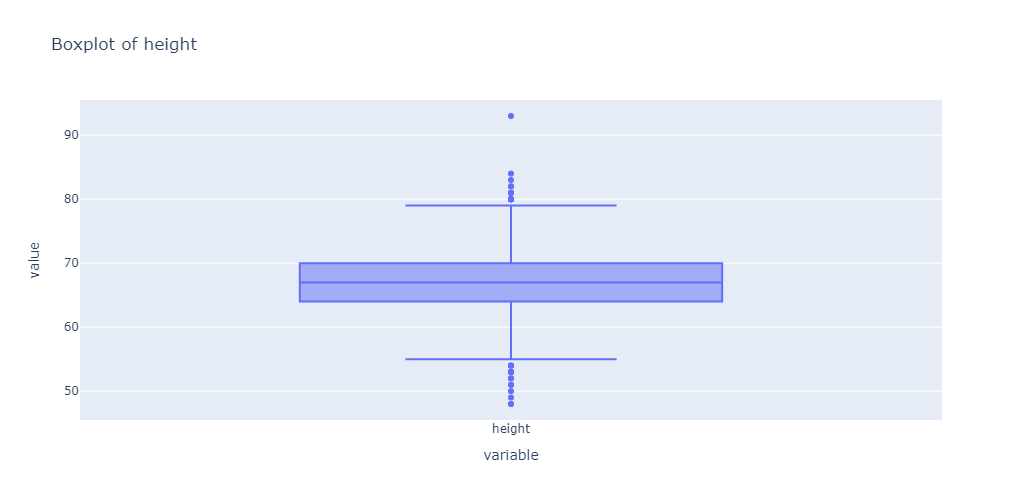

In [143]:
px.box(cdc['height'], title = 'Boxplot of height', width=500, height=500)

Anhand der zusammenfassenden Statistiken können wir die Lage der einzelnen Komponenten der Box vergleichen ("Fünf-Punkte-Zusammenfassung"). Diese sehen Sie auch, wenn Sie die Maus über den Plot bewegen.

In [35]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

Vergewissern Sie sich, dass der Median sowie das obere und untere Quartil in der numerischen Zusammenfassung mit denen im Diagramm übereinstimmen. Der Zweck eines Boxplots besteht darin, eine Miniaturskizze einer Variablen zu erstellen, um sie über mehrere Kategorien hinweg zu vergleichen. So können wir zum Beispiel die Körpergröße von Männern und Frauen vergleichen mit

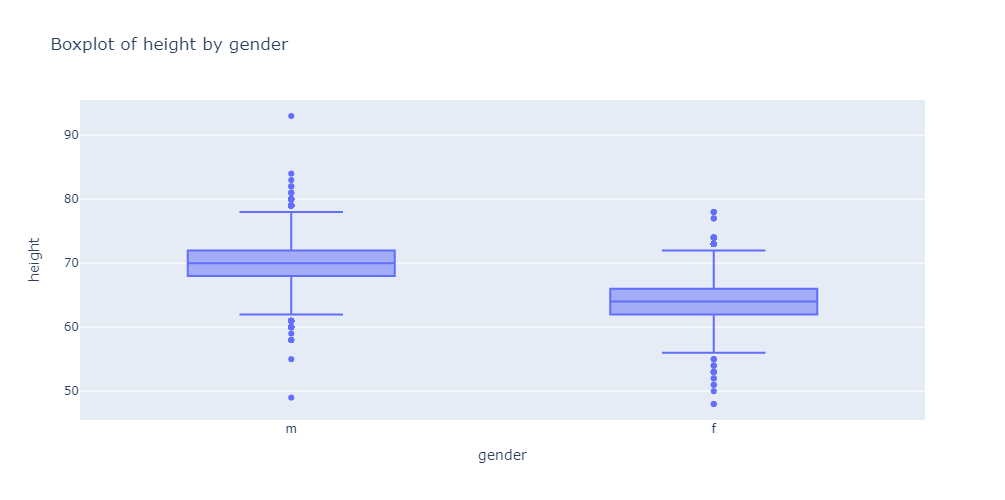

In [144]:
px.box(data_frame=cdc, x="gender", y="height", title = 'Boxplot of height by gender', width=700, height=500)

Hier benutzen wir einen weitere komfortable Funktionalität von plotly: Über das Argument `data_frame=cdc` übergeben wir den gesamten DataFrame. Für die Argumente `x=` und `y=` braucht man dann nur die entsprechenden Spaltennamen des DataFrames anzugeben.

Betrachten wir nun eine neue Variable, die in diesem Datensatz nicht direkt auftaucht: Body Mass Index ([BMI](http://en.wikipedia.org/wiki/Body_mass_index)). Der BMI ist ein Verhältnis zwischen Gewicht und Größe und kann wie folgt berechnet werden:

**BMI** = $\displaystyle\frac{mass_{kg}}{height^2_{m}} = \frac{mass_{lb}}{height^2_{in}}\times703$

703 ist der ungefähre Umrechnungsfaktor für die Umrechnung von metrischen Einheiten (Meter und Kilogramm) in imperiale Einheiten (Zoll und Pfund).

In den folgenden beiden Zeilen wird zunächst ein neues Objekt mit dem Namen `bmi` erstellt und dann ein Boxplot dieser Werte erstellt, wobei die Gruppen durch die Variable `genhlth` definiert werden.

In [146]:
bmi = (cdc['weight'] / (cdc['height'])**2) * 703

Beachten Sie, dass dies eine Berechnung ist, die auf alle 20.000 Zahlen im `cdc`-Datensatz angewendet wird. Das heißt, für jeden der 20.000 Teilnehmer nehmen wir sein Gewicht, teilen es durch seine Größe im Quadrat und multiplizieren es dann mit 703. Das Ergebnis sind 20.000 BMI-Werte, einer für jeden Befragten.

Auch hier übergeben wir plotly den gesamten DataFrame als Argument. Die Argumente `x=` und `y=` können sich entweder auf Spalten dieses Datensatzes beziehen oder aber man übergibt darin weitere Daten (hier: die Werte `bmi`). 

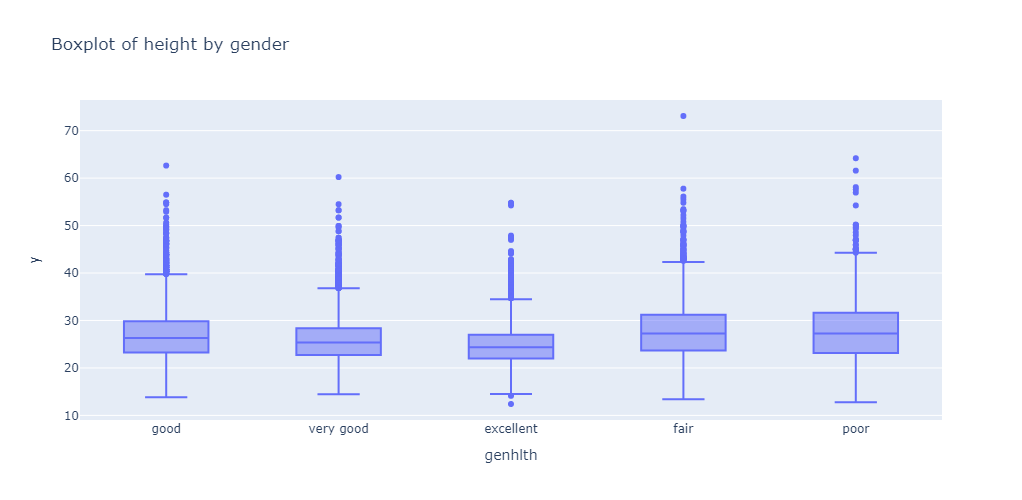

In [157]:
px.box(data_frame=cdc, x="genhlth", y=bmi, title = 'Boxplot of height by gender', width=700, height=500)

### ✏️ Aufgabe 5
Was sagt dieser Boxplot aus? Wählen Sie eine andere kategoriale Variable aus dem Datensatz und untersuchen Sie, wie sie mit dem BMI zusammenhängt. Führen Sie die von Ihnen gewählte Variable auf, begründen Sie, warum Sie einen Zusammenhang mit dem BMI vermuten, und geben Sie an, worauf die Abbildung hinzudeuten scheint.

Zum Schluss wollen wir noch einige Histogramme erstellen. Wir können schauen uns das Histogramm für das Alter unserer Befragten mit folgendem Befehl an:

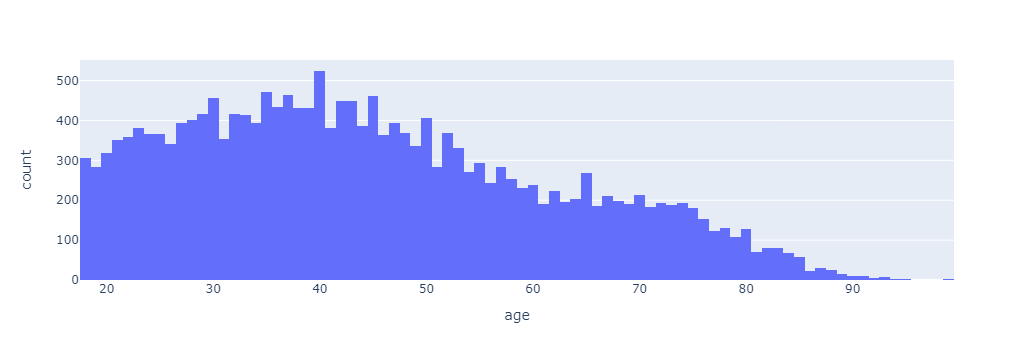

In [172]:
px.histogram(data_frame=cdc, x="age")

Histogramme sind im Allgemeinen eine sehr gute Möglichkeit, die Form einer univariaten Verteilung zu erkennen, aber diese Form kann sich ändern, je nachdem, wie die Daten auf die verschiedenen Bins aufgeteilt sind. Sie können die Anzahl der Bins steuern, indem Sie das Argument `nbins=` übergeben. Als nächstes wird zunächst ein Standardhistogramm von "bmi" und dann eines mit einer mit 50 Bins erstellt.

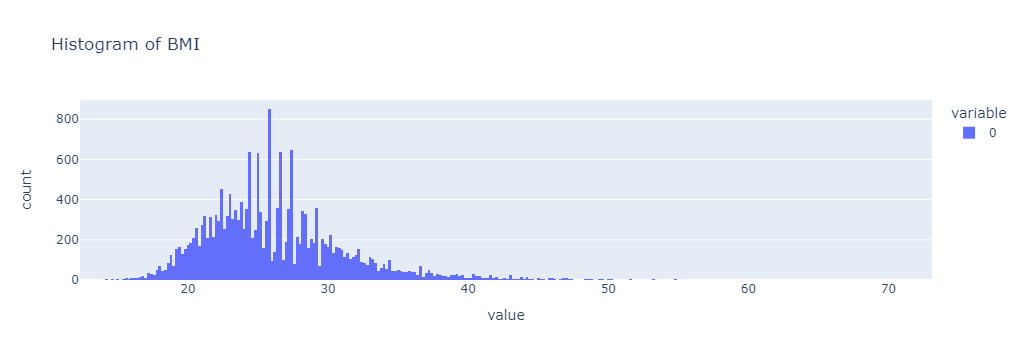

In [181]:
px.histogram(bmi, title = 'Histogram of BMI')

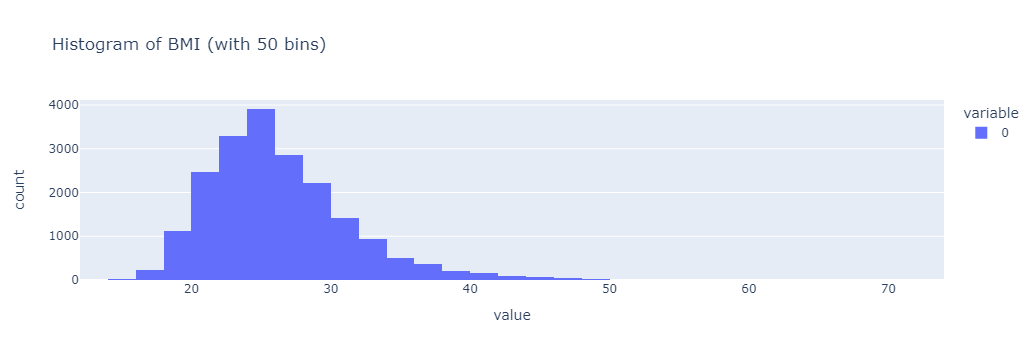

In [182]:
px.histogram(bmi, nbins=50, title = 'Histogram of BMI (with 50 bins)')

Was fällt Ihnen beim Vergleich dieser beiden Histogramme auf?

---

WIr haben nun einen guten ersten Versuch unternommen, die Informationen aus dem BRFSS-Fragebogen zu analysieren. Wir haben einen interessanten Zusammenhang zwischen Rauchgewohnheiten und Geschlecht gefunden, und wir können etwas über die Beziehung zwischen der Einschätzung des allgemeinen Gesundheitszustands der Menschen und ihrem eigenen BMI sagen. Wir haben auch wichtige Tools kennengelernt - zusammenfassende Statistiken, Untergruppen und Diagramme -, die wir in diesem Kurs gut gebrauchen können.

## ✏️ Weitere Aufgaben
1. Erstellen Sie ein Streudiagramm von Gewicht und Wunschgewicht. Benutzen Sie dafür den Befehl `px.scatter`. Beschreiben Sie (in Worten) die Beziehung zwischen diesen beiden Variablen.
2. Betrachten Sie eine neue Variable: die Differenz zwischen dem gewünschten Gewicht (`wtdesire`) und dem aktuellen Gewicht (`weight`). Erstellen Sie diese neue Variable, indem Sie die beiden Spalten im DataFrame subtrahieren und sie einem neuen Objekt namens "wdiff" zuweisen.
3. Von welchem Merkmalstyp ist `wdiff`? Wenn eine Beobachtung `wdiff` gleich 0 ist, was bedeutet dies über das Gewicht und das Wunschgewicht der Person. Was ist, wenn `wdiff` positiv oder negativ ist?
4. Beschreiben Sie die Verteilung von `wdiff` im Hinblick auf ihr Zentrum, ihre Form und ihre Streuung, einschließlich der von Ihnen verwendeten Diagramme. Was sagt dies darüber aus, wie die Menschen ihr aktuelles Gewicht einschätzen?
5. Bestimmen Sie anhand von numerischen Zusammenfassungen und einem Boxplot, ob Männer dazu neigen, ihr Gewicht anders zu sehen als Frauen.
6. Berechnen Sie den Mittelwert und die Standardabweichung von `weight` und bestimmen Sie, welcher Anteil der Gewichte innerhalb von einer Standardabweichung vom Mittelwert liegt.

---

Diese Übung ist eine deutsche Übersetzung der Übungen aus OpenIntro Statistics von Andrew Bray und Mine Çetinkaya-Rundel (https://www.openintro.org/book/os/). Die Python Adaption stammt von David Akman und Imran Ture (www.featureranking.com).